In [22]:
# import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from classy import Class
from math import pi
mpl.rcParams['font.size']=13.5

In [23]:
def setup_axis(ax, xlabel=None, ylabel=None, xscale=None, yscale=None, 
               fs=18, title=None):
    if xlabel: ax.set_xlabel(xlabel, fontsize=fs)
    if ylabel: ax.set_ylabel(ylabel, fontsize=fs)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if title:  ax.set_title(title, fontsize=fs)
    return ax

In [24]:
# use input rotation field power spectrum
#
# "input_claa" is the file of the input rotation field power spectrum
#
# the input rotation power spectrum should be stored in one column from l=0
#
# "input_claa" and "A_cb" should not be given both.
#
params = {
        'output': 'tCl,pCl,rCl',
        'l_max_scalars': 4000,
        'modes':'s,t',
        'r':0.004,
        'rotation': 'yes',
        'alpha': 0.1,
        'input_claa': '../input_claa.txt'}

cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])
rot_cls = cosmo.rotated_cl()

<AxesSubplot:xlabel='$\\ell$', ylabel='$D_{\\ell}^{BB}[\\mu K^2]$'>

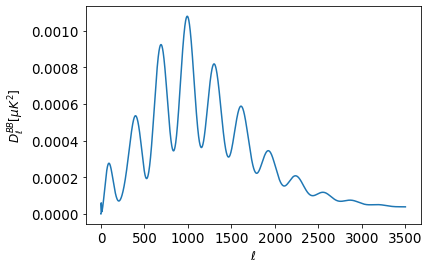

In [27]:
# plot the rotated BB power spectrum
#
ellmax = 3500
ells = np.arange(2, ellmax+1)
factor = ells*(ells+1)/(2*pi)
ells = np.arange(0, ellmax+1)
factor = ells*(ells+1)/(2*pi)
plt.plot(ells, 2.72e6**2*factor*rot_cls['bb'][ells])
setup_axis(plt.gca(), xlabel=r'$\ell$', ylabel=r'$D_{\ell}^{BB}[\mu K^2]$',\
            fs=12)

<AxesSubplot:xlabel='$\\ell$', ylabel='$C_{\\ell}^{\\alpha\\alpha}$'>

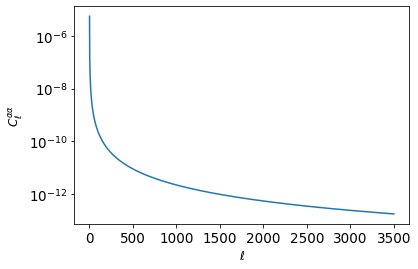

In [26]:
# have a look of the input rotation power spectrum
#
input_claa = np.loadtxt('../input_claa.txt')
plt.plot(ells[1:], (input_claa[ells])[1:])
setup_axis(plt.gca(), xlabel=r'$\ell$', ylabel=r'$C_{\ell}^{\alpha\alpha}$',\
            fs=12, yscale='log')